# Homework Solution - Regression
Notebook ini berisi solusi dari homework regression. Solusi yang dituliskan disini hanya contoh dasar dan dapat dikembangkan di banyak hal.

<b>Goal: </b> Prediksi views dari youtube berdasarkan atribut-atribut lainnya

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel('youtube_statistics.xlsx')
df.tail(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
36789,2018-06-14,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,15:07:49,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,False,False,False,Nuabohu : Story of a rustic village girl who w...,15,432,64,2018-06-13
36790,2018-06-14,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,04:29:54,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...,14,1030,76,2018-06-10


# Simple Exploratory Data Analysis
Bagian ini akan sedikit membahas mengenai kondisi data secara keseluruhan. Karena bukan fokus pada modul Supervised Learning, Bagian ini tidak akan digali insight lebih banyak

## General Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

Deskripsi menggunakan fungsi `info()` untuk mengetahui kondisi dari dataset (tipe data, adanya nilai null, hingga jumlah baris)
- Terdapat 36,791 rows
- Tidak ada kolom yang mempunyai nilai NULL, sehingga tidak diperlukan drop null values

## Variabel Numerik

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


## Univariate Analysis

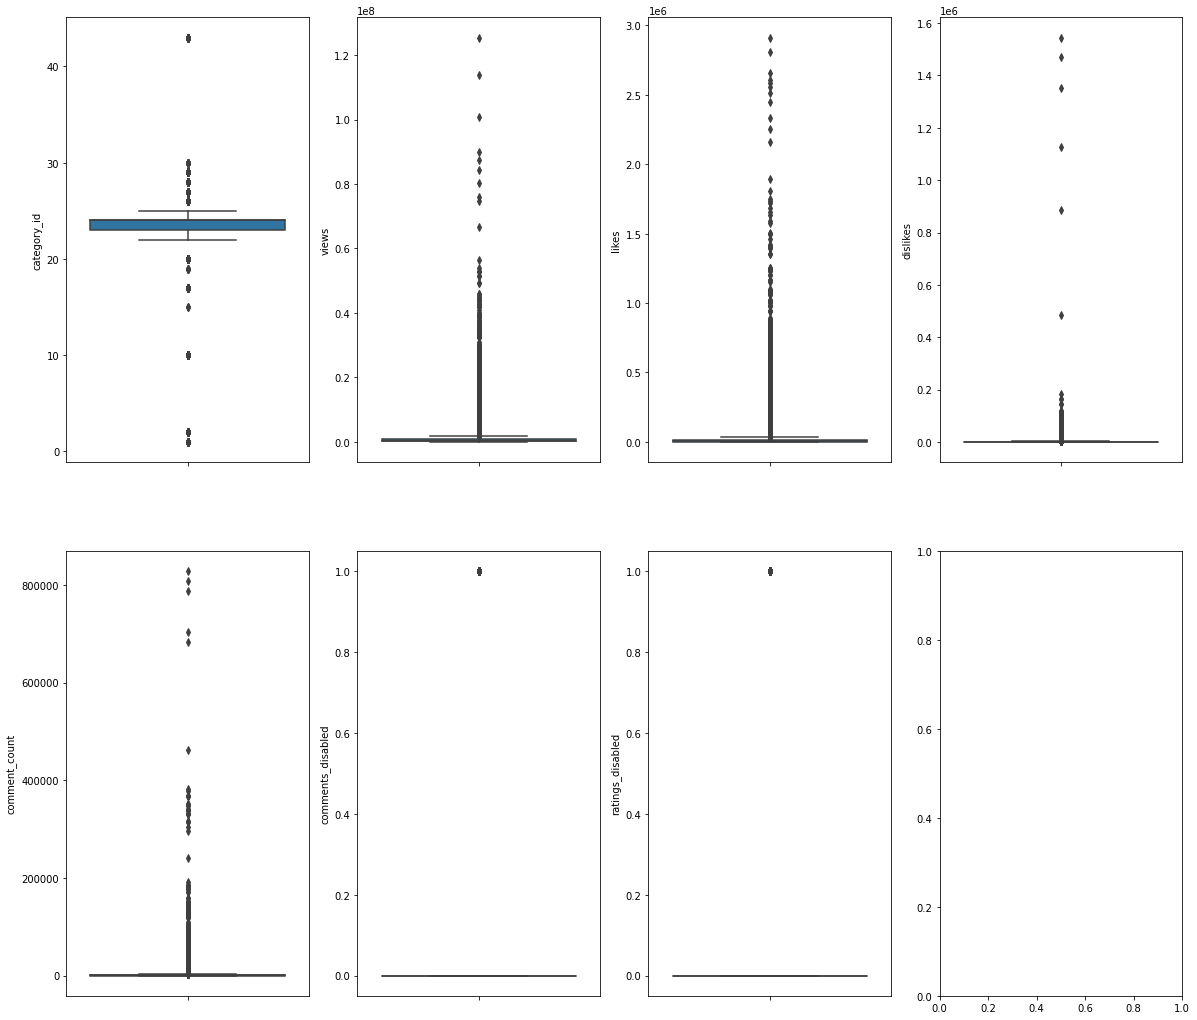

In [ ]:
#using boxplot
features = df.select_dtypes(["float64", "int64", "boolean"]).columns

fig, ax = plt.subplots(2, 4, figsize=(20, 18))
rows    = [0]*4 + [1]*3
cols    = [0, 1, 2, 3] * 2
for row, col, feature in zip(rows, cols, features):
    sns.boxplot(y=feature, data=df[features], ax=ax[row, col])

Banyak outlier yang ada pada feature. jika kita menggunakan algoritma linear regression, penting untuk dihilangkan outlier yang ada, namun jika menggunakan algoritma tree based (decision tree, random forest, xgboost), tidak wajib untuk dihilangkan outlier karena algoritma tree based cukup robust untuk mengatasi hal ini

## Multivariate Analysis

<AxesSubplot:>

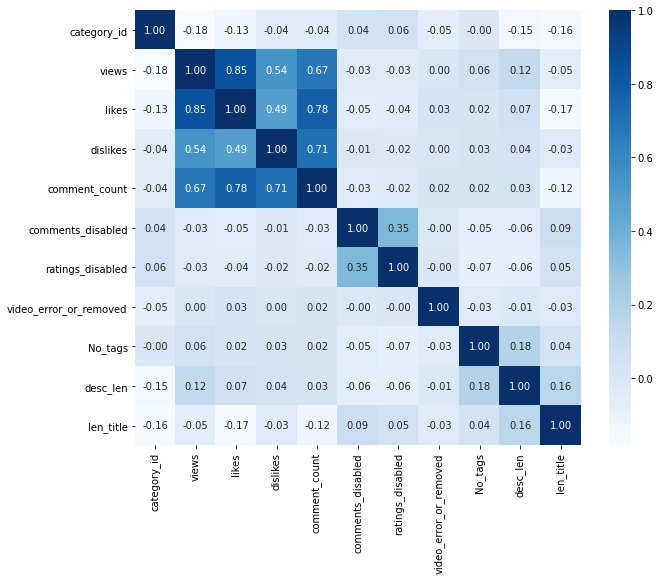

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

- Kolom yang memiliki korelasi tinggi terhadap target (>0.5) adalah likes, dislikes, dan comment_count.
- Jika kita menggunakan algoritma linear regression untuk melatih model kita, penting untuk memperhatikan asumsi multikolinearitas dengan menghindari korelasi antar feature yang tinggi, sepertil likes, dislikes, atau comment count (dapat dipilih salah satu feature saja)

# Preprocessing

## Missing Values

In [ ]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [ ]:
df.shape

(36791, 18)

Terdapat 45 rows missing value pada description, jumlahnya cukup sedikit dibandingkan dengan total rows sebanyak 36,791. Dapat kita hapus saja.

In [ ]:
df = df.dropna()

## Duplicate Values

In [ ]:
df.duplicated().sum()

4228

In [ ]:
df = df.drop_duplicates()

## Outliers
- Untuk linear regression, penting untuk dilakukan outliers removal untuk menghindari noise pada data yang mempengaruhi hasil garis linear.

In [ ]:
features = df.select_dtypes(["float64", "int64", "boolean"]).columns

for f in features:
    Q1 = df[f].quantile(0.25)
    Q3 = df[f].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    filtered_entries = ((df[f] >= low_limit) & (df[f] <= high_limit))
    df = df[filtered_entries]
df.shape

(14298, 18)

# Feature Engineering
Sebagai contoh kita dapat melihat apakah video di-upload pada weekday/weekend

In [ ]:
df.publish_date = pd.to_datetime(df.publish_date)
to_one_hot = df.publish_date.dt.day_name()
days = pd.get_dummies(to_one_hot)

In [ ]:
day_names = df.publish_date.dt.day_name()
is_weekend = day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0).to_frame()
is_weekend = is_weekend.rename(columns={'publish_date':'is_weekend'})

In [ ]:
df = pd.concat([df, days], axis=1)
df = pd.concat([df, is_weekend], axis=1)
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,...,len_title,publish_date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,is_weekend
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,...,81,2017-11-12,0,0,0,1,0,0,0,1
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,...,58,2017-11-13,0,1,0,0,0,0,0,0
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,...,58,2017-11-12,0,0,0,1,0,0,0,1
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,...,30,2017-11-12,0,0,0,1,0,0,0,1
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,...,88,2017-11-13,0,1,0,0,0,0,0,0


Hasil dari feature hari dan is_weekend sudah ditambahkan pada dataset

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler

- Pada bagian dibawah ini akan dilakukan split data train dan test.
- Data akan dilakukan standardisasi dengan menggunakan RobustScaler(). RobustScaler baik digunakan jika pada data kita terdapat outlier
- Scaling akan dilakukan pada data training terlebih dahulu, kemudian setting scaling dari data training akan digunakan pada data testing selanjutnya

In [ ]:
features = df.select_dtypes(["float64", "int64", "boolean"]).columns
x = df[features].drop("views", axis=1)
y = df.views

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3, random_state=42)

# Create a train and test dataset
data_train = pd.concat([xtrain, ytrain], axis=1)
data_test  = pd.concat([xtest, ytest], axis=1)

# Standardize the data
scaler    = RobustScaler()
scaler.fit(data_train)
std_train = scaler.transform(data_train)
std_test  = scaler.transform(data_test)

# Turn into data frame
std_train = pd.DataFrame(std_train, columns=data_train.columns)
std_test  = pd.DataFrame(std_test, columns=data_test.columns)

# Re-split the data
xtrain_std = std_train.drop("views", axis=1)
ytrain_std = std_train.views
xtest_std  = std_test.drop("views", axis=1)
ytest_std  = std_test.views

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(ytest, pred):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [ ]:
models = {
    "Linear"     : LinearRegression(),
    "Ridge"      : Ridge(),
    "Lasso"      : Lasso(),
    "Elasticnet" : ElasticNet(),
    "DT"         : DecisionTreeRegressor(),
    "RF"         : RandomForestRegressor(),
    "SVR"        : SVR()
}

for model_name, model in models.items():
    model.fit(xtrain_std, ytrain_std)
    y_pred = model.predict(xtest_std)
    print("Evaluate model: {}".format(model_name))
    print(eval_regression(ytest_std, y_pred), "\n")

Evaluate model: Linear
MAE: 1.07
RMSE: 2.65
R2 score: 0.72
None 

Evaluate model: Ridge
MAE: 1.07
RMSE: 2.65
R2 score: 0.72
None 

Evaluate model: Lasso
MAE: 1.01
RMSE: 2.72
R2 score: 0.71
None 

Evaluate model: Elasticnet
MAE: 1.01
RMSE: 2.70
R2 score: 0.71
None 

Evaluate model: DT
MAE: 0.52
RMSE: 1.69
R2 score: 0.89
None 

Evaluate model: RF
MAE: 0.42
RMSE: 1.19
R2 score: 0.94
None 

Evaluate model: SVR
MAE: 0.79
RMSE: 3.33
R2 score: 0.56
None 



Dari 7 algoritma yang diuji coba, didapatkan performa yang paling baik dengan menggunakan random forest, dengan RMSE paling rendash sebesar 1.17 dan R2 score paling rendah yaitu sebesar 0.94. Selanjutnya akan kita lakukan tuning hyperparameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)], # Jumlah subtree
                       criterion = ['mse','mae'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  # Maximum kedalaman tree
                       n_jobs = [3], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestRegressor(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='r2')
rf_tuned.fit(xtrain_std, ytrain_std)

# Predict & Evaluation
y_pred = rf_tuned.predict(xtest_std)#Check performa dari model
eval_regression(ytest_std, y_pred)

MAE: 0.42
RMSE: 1.18
R2 score: 0.94


Hasil akhir dari model menggunakan tuning hyperparameter dari random forest dengan nilai hyperparameter terbaik:

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 100
Best criterion: mae
Best max_depth: 60
Best n_jobs: 3


<b>Insight tambahan: Feature Importance</b> (Optional)
<br/>Dari model yang dibentuk, kita dapat mengetahui feature mana yang berperan penting untuk melakukan prediksi views. Hasil dari feature importance ditujukkan dibawah ini.

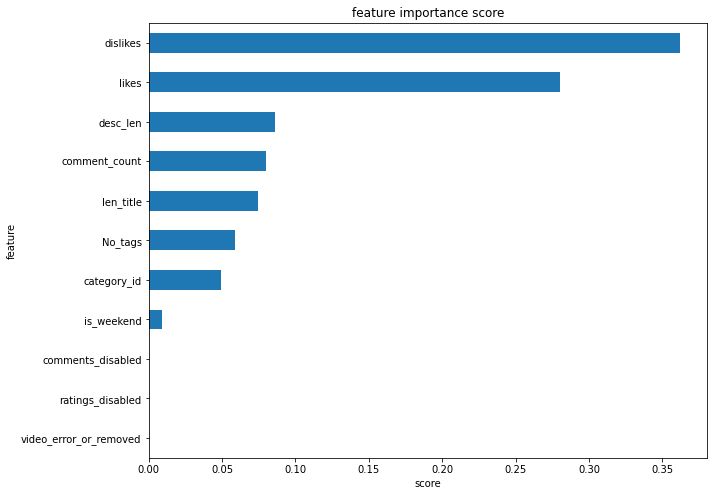

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

Berdasarkan feature importance score diatas, dapat dilihat feature dislikes, likes, desc_len merupakan top feature importance yang dapat kita jadikan fokus untuk mendapatkan view yang lebih. Feature lain seperti comments_disabled, ratings_disabled, ataupun video_error mempunyai score feature importance yang sangat rendah. Selanjutnya feature ini dapat dilakukan landasan untuk feature selection pada iterasi selanjutnya.